# Regresíon Logistica Random Forest

---

In [21]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming :


` Teniendo presente los resultados que hemos obtenido en el pairprogramming anterior (Decision Tree), vamos a proceder a realizar el Random Forest solo sobre los datos codificados(SIN estandarizar).`

In [8]:
df1 = pd.read_csv("../files_rl/2-heart-encoding.csv", index_col = 0)
df1.head()

,age,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,40,140,0,1,172,1,0.0,3,0,289.0,0,1,0,1,0,0
1,49,160,0,1,156,1,1.0,1,1,180.0,1,0,0,0,1,0
2,37,130,0,2,98,1,0.0,3,0,283.0,0,1,0,1,0,0
3,48,138,0,1,108,2,1.5,1,1,214.0,1,0,1,0,0,0
4,54,150,0,1,122,1,0.0,3,0,195.0,0,1,0,0,1,0


## Modelo 1: Codificado SIN estandarizar

### 1.1 Ajustad un modelo de Random Forest a nuestros datos.


In [9]:
#Separamos nuestras variables x e y 
X1 = df1.drop("heartdisease", axis = 1)
y1 = df1["heartdisease"]

In [10]:
# Separamos la muestra en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [11]:
#  hiperparámetros que queremos (relacionados con el pair de Decision Tree)

param1 = {"max_depth": [2,4, 6, 10], # profundidad del modelo.
        "max_features": [1,2,3,4],#  Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [12]:
gs_rf1 = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param1, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [13]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf1.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [14]:
# saquemos ahora cual es nuestro mejor bosque

bosque1= gs_rf1.best_estimator_
bosque1

RandomForestClassifier(max_depth=6, max_features=2, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

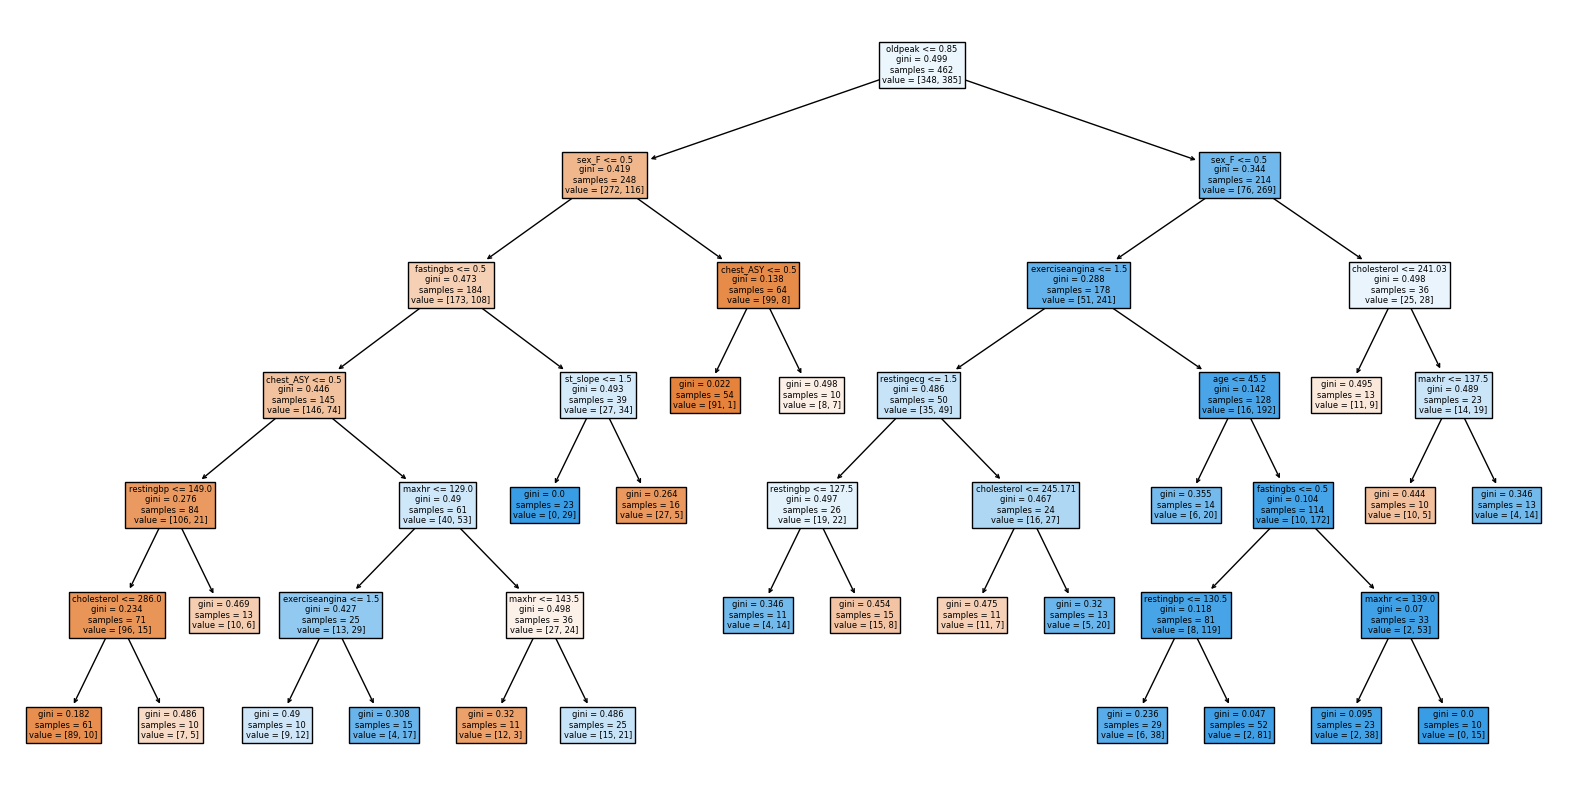

In [15]:
# dibujamos el primer árbol de nuestro bosque.

fig = plt.figure(figsize=(20, 10))
tree.plot_tree(bosque1[0], feature_names= x_train1.columns, filled = True)
plt.show()

### 2.2 Calculad las métricas a nuestro nuevo modelo.


In [16]:
y_pred_test_rf1 = bosque1.predict(x_test1)
y_pred_train_rf1= bosque1.predict(x_train1)

In [17]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [18]:
dt_results = metricas(y_test1, y_pred_test_rf1,y_train1,  y_pred_train_rf1, "Random Forest I")
dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.891304,0.925926,0.892857,0.909091,0.774067,test,Random Forest I
1,0.882674,0.870504,0.918987,0.894089,0.762806,train,Random Forest I


In [30]:
metricas = pd.read_csv("../files_rl/2-metricas-rl.csv", index_col=0) #Abrimos el df con las metricas de los otros modelos
metricas

,accuracy,precision,recall,f1,kapppa,set,modelo
2,0.865942,0.885057,0.900585,0.892754,0.714046,test,Regresión logistica Cod
3,0.861154,0.862170,0.875000,0.868538,0.721447,train,Regresión logistica Cod
6,0.875000,0.893805,0.901786,0.897778,0.736947,test,Decission Tree II
7,0.859482,0.836406,0.918987,0.875754,0.714880,train,Decission Tree II


In [31]:
#Decidimos dejar para la comparacion las metricas del mejor modelo(Decision Tree II)
metricas.drop([2,3],axis=0,inplace=True)

### 3.Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [32]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_resultados = pd.concat([dt_results, metricas], axis = 0).reset_index(drop=True)
df_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.891304,0.925926,0.892857,0.909091,0.774067,test,Random Forest I
1,0.882674,0.870504,0.918987,0.894089,0.762806,train,Random Forest I
2,0.875000,0.893805,0.901786,0.897778,0.736947,test,Decission Tree II
3,0.859482,0.836406,0.918987,0.875754,0.714880,train,Decission Tree II


In [33]:
df_resultados.style.background_gradient()

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.891304,0.925926,0.892857,0.909091,0.774067,test,Random Forest I
1,0.882674,0.870504,0.918987,0.894089,0.762806,train,Random Forest I
2,0.875000,0.893805,0.901786,0.897778,0.736947,test,Decission Tree II
3,0.859482,0.836406,0.918987,0.875754,0.714880,train,Decission Tree II


In [35]:
df_resultados.to_csv("../files_rl/3-metricas.csv")

`Conclusión:`

`Vemos que el modelo Random Forest I en relacion al Decision Tree II  arrojan mejores resultados en sus metricas.`

Al analizar los dos modelos vemos que ambos arrojan un kappa alto, sin embargo para nuestro análisis es prioritario el análisis del recall, ya que preferimos  considerar los falsos negativos(que me diga que tiene cardiopatía cuando en realidad el corazón es normal),  en este ultimo análisis vemos que existe una diferencia no significativa entre los dos modelos por lo que para definir que modelo se ajusta mejor nos quedaremos con el de mayor kappa que es el Random Forest I, cuya precision además es mas alta.




In [42]:
# vamos a crearnos un dataframe con las variables incluidas en el modelo segun su importancia

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': bosque1.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
7,st_slope,0.224561
6,oldpeak,0.129677
5,exerciseangina,0.126813
11,chest_ASY,0.124159
12,chest_ATA,0.079694
4,maxhr,0.077321
0,age,0.046380
9,sex_F,0.045046
10,sex_M,0.041920
2,fastingbs,0.029226


Tenemos que volver a unir los datos de las columnas generadas con el metodo get_dummies al momento de codificarlas.

In [43]:
# lo primero que hacemos es crearnos un dataframe con los valores solo chest
chest= importancia_predictores.iloc[[3, 4,12,14]]
chest

,predictor,importancia
11,chest_ASY,0.124159
12,chest_ATA,0.079694
13,chest_NAP,0.016827
14,chest_TA,0.003827


In [44]:
#Otro con los valores de sex
sex= importancia_predictores.iloc[[7, 8]]
sex

,predictor,importancia
9,sex_F,0.045046
10,sex_M,0.041920


In [45]:
#Eliminamos las columnas del df de predictores
importancia_predictores.drop(chest.index, inplace = True)
importancia_predictores.drop(sex.index, inplace = True)

In [46]:
importancia_predictores

,predictor,importancia
7,st_slope,0.224561
6,oldpeak,0.129677
5,exerciseangina,0.126813
4,maxhr,0.077321
0,age,0.046380
2,fastingbs,0.029226
8,cholesterol,0.025812
1,restingbp,0.022632
3,restingecg,0.006106


In [47]:
#Agregamos las columnas sumadas al df de preditores
importancia_predictores.loc[9] =  ["ChestPainType", chest["importancia"].sum()]
importancia_predictores.loc[10] =  ["sex", sex["importancia"].sum()]

In [49]:
importancia_predictores.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores

,predictor,importancia
7,st_slope,0.224561
9,ChestPainType,0.224507
6,oldpeak,0.129677
5,exerciseangina,0.126813
10,sex,0.086965
4,maxhr,0.077321
0,age,0.046380
2,fastingbs,0.029226
8,cholesterol,0.025812
1,restingbp,0.022632


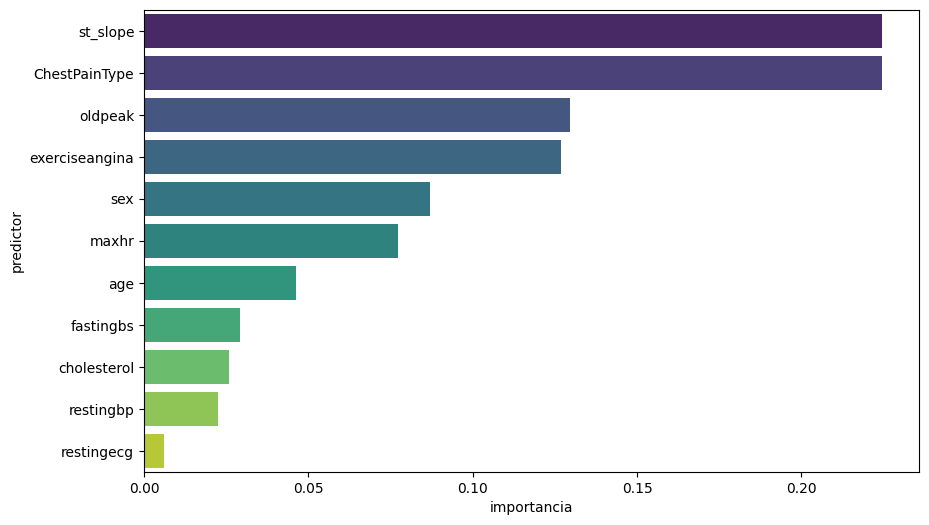

In [50]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

RECORDAMOS:

`Variables predictoras:`


- Age: edad del paciente en años

- Sex: sexo del paciente [M: Male, F: Female]

- ChestPainType: tipo de dolor de pecho [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- RestingBP: presión sanguinea en reposo[mm Hg]

- Cholesterol: colesterol [mm/dl]

- FastingBS: azúcar en sangre [1: if FastingBS > 120 mg/dl, 0: otherwise]

- RestingECG: electrocardiograma resultados [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- MaxHR: frecuencia cardíaca máxima alcanzada [Numeric value between 60 and 202]

- ExerciseAngina:  angina inducida por el ejercicio [Y: Yes, N: No]

- Oldpeak: oldpeak = ST pico mas bajo del electrocardiograma [Numeric value measured in depression]

- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


`Variable respuesta`

- HeartDisease: cardiopatía [1: heart disease, 0: Normal]

`Concluimos que las variables preditoras mas importantes son:`

    - ST_Slope: relacionado con los resultados de Ergometría
    - ChestPainType: tipo de dolor de pecho
    